***Problem Statement***

Business Context:

Analytics driving every industry based on a variety of technology platforms which collect information
from various sources by analysing what customers certainly want. The Credit Card industry is also
data rich industry and data can be leveraged in infinite ways to understand customer behaviour.
The data from a credit card processor shows the consumer types and their business spending
behaviours. Therefore, companies can develop the marketing campaigns that directly address
consumers’ behaviour. In return, this helps to make better sales and the revenue undoubtedly grows
greater sales.
    
Understanding the consumption pattern for credit cards at an individual consumer level is important
for customer relationship management. This understanding allows banks to customize for
consumers and make strategic marketing plans. Thus it is imperative to study the relationship
between the characteristics of the consumers and their consumption patterns.
Business Objectives:
    
One of the leading banks provided below data
a. Customer Demographics
    
b. Customer Behavioural data (information on liabilities, assets and history of transactions with the bank for each customer). Data has been provided for a particular set of customers' credit
card spend in the previous 3 months (April, May & June) and their expected average spend
in the coming 3 months (July, August & September)
                                          
c. Credit consumption

Note: Some customers are having missing values for credit consumption. You need to build
the model using customer’s data where credit consumption is non- missing’s. You need to
predict the credit consumption for next three months for the customers having missing
values.
Model Evaluation Metric:
You should validate model using Root Mean Square Percentage Error (RMSPE) between the
predicted credit card consumption and Actual Credit Consumption.
Expected Outputs:
    
a. Detailed code with comments
    
b. Data Exploratory analysis
    
c. Model validation outputs
    
d. Model documentation with all the details
    
e. Predicted values for customers where target variable having missing values

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset

cust=pd.read_excel('CustomerDemographics.xlsx')
cust.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0
1,11491,current,M,37,LOW,14.4,7,7,485,0
2,7433,current,M,33,MEDIUM,3.2,1,1,764,0
3,14606,current,M,63,LOW,10.2,6,6,863,0
4,8381,saving,M,33,MEDIUM,26.4,6,6,523,0


In [4]:
# Importing data:

cust_beh=pd.read_excel('CustomerBehaviorData.xlsx')
cust_beh.head()

,ID,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,2017.46,29066.66,15919.84,2197.00,3752.000,29798.00,1.0,4,35,...,47,20,41860.0,32734.75,80959.00,36,9,171200.0,Y,3448.84
1,11491,7687.00,1308.00,41888.92,2216.92,7060.530,3143.36,2.0,27,50,...,0,8,113367.0,60974.75,495080.00,5,3,15694.0,Y,3812.69
2,7433,9094.46,14825.95,3087.64,769.59,25602.595,1445.00,44.0,8,47,...,2,14,168000.0,425802.96,115707.38,7,58,28058.0,Y,9432.90
3,14606,3126.00,4616.33,8676.80,5923.00,6717.000,18747.00,4.0,30,1,...,45,44,57750.0,25537.91,63606.00,12,0,24459.0,Y,144.61
4,8381,24988.72,10091.23,10132.00,3477.00,4667.000,511.00,2.0,8,5,...,1,2,18405.0,64687.32,62353.35,49,35,31574.0,Y,1887.89


In [5]:
# Importing data:

cc= pd.read_excel('CreditConsumptionData.xlsx')
cc.head()

,ID,cc_cons
0,17051,16239.0
1,11491,39002.0
2,7433,21182.0
3,14606,8123.0
4,8381,28282.0


In [6]:
cust.shape, cust_beh.shape, cc.shape

((20000, 10), (20000, 39), (20000, 2))

-----------

***We need to build the model using customer’s data where credit consumption is non- missing’s. We need to
predict the credit consumption for next three months for the customers having missing
values***

***In the given dataset we need to predict the credit card consumption which is the continuous numerical column.***
***Hence it the regression based problem statement.***

-----------

#### Identifying and handling null values

In [7]:
cust.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
region_code                     0
NetBanking_Flag                 0
Avg_days_between_transaction    0
dtype: int64

In [8]:
cust_beh.isna().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              1
dc_cons_may              1
cc_cons_jun              0
dc_cons_jun              1
cc_count_apr             1
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     1
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             2
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          1
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [9]:
cust_beh.dtypes

ID                         int64
cc_cons_apr              float64
dc_cons_apr              float64
cc_cons_may              float64
dc_cons_may              float64
cc_cons_jun              float64
dc_cons_jun              float64
cc_count_apr             float64
cc_count_may               int64
cc_count_jun               int64
dc_count_apr               int64
dc_count_may               int64
dc_count_jun               int64
card_lim                   int64
personal_loan_active       int64
vehicle_loan_active        int64
personal_loan_closed     float64
vehicle_loan_closed        int64
investment_1             float64
investment_2             float64
investment_3             float64
investment_4             float64
debit_amount_apr         float64
credit_amount_apr        float64
debit_count_apr          float64
credit_count_apr           int64
max_credit_amount_apr    float64
debit_amount_may         float64
credit_amount_may        float64
credit_count_may           int64
debit_coun

In [10]:
cust_beh.nunique()

ID                       20000
cc_cons_apr               8459
dc_cons_apr               3861
cc_cons_may               8504
dc_cons_may               4053
cc_cons_jun               7347
dc_cons_jun               3019
cc_count_apr                50
cc_count_may                58
cc_count_jun                67
dc_count_apr                41
dc_count_may                39
dc_count_jun                54
card_lim                   308
personal_loan_active         1
vehicle_loan_active          1
personal_loan_closed         1
vehicle_loan_closed          1
investment_1               691
investment_2               532
investment_3               246
investment_4               115
debit_amount_apr          8724
credit_amount_apr         8153
debit_count_apr             63
credit_count_apr            31
max_credit_amount_apr     5996
debit_amount_may          8576
credit_amount_may         8144
credit_count_may            31
debit_count_may             57
max_credit_amount_may     5299
debit_am

In [11]:
## Imputing the null values of categorical column with mode

val=cust_beh['loan_enq'].mode().values[0]

cust_beh['loan_enq'].fillna(val,inplace=True)

In [12]:
## Imputing continuous column with median values

median_val=cust_beh.select_dtypes('number').median()

cust_beh.fillna(median_val,inplace=True)

In [13]:
cust_beh.isna().sum()

ID                       0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
personal_loan_active     0
vehicle_loan_active      0
personal_loan_closed     0
vehicle_loan_closed      0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
l

In [14]:
cc.isna().sum()

ID            0
cc_cons    5000
dtype: int64

In [15]:
### Data merging:

final_df=cust.merge(cc.merge(cust_beh, how='left'), how='inner')
display(final_df.head())
display(final_df.shape)
final_df.isna().sum()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,current,M,30,MEDIUM,26.4,9,9,355,0,...,47,20,41860.0,32734.75,80959.00,36,9,171200.0,Y,3448.84
1,11491,current,M,37,LOW,14.4,7,7,485,0,...,0,8,113367.0,60974.75,495080.00,5,3,15694.0,Y,3812.69
2,7433,current,M,33,MEDIUM,3.2,1,1,764,0,...,2,14,168000.0,425802.96,115707.38,7,58,28058.0,Y,9432.90
3,14606,current,M,63,LOW,10.2,6,6,863,0,...,45,44,57750.0,25537.91,63606.00,12,0,24459.0,Y,144.61
4,8381,saving,M,33,MEDIUM,26.4,6,6,523,0,...,1,2,18405.0,64687.32,62353.35,49,35,31574.0,Y,1887.89


(20000, 49)

ID                                 0
account_type                       0
gender                             0
age                                0
Income                             0
Emp_Tenure_Years                   0
Tenure_with_Bank                   0
region_code                        0
NetBanking_Flag                    0
Avg_days_between_transaction       0
cc_cons                         5000
cc_cons_apr                        0
dc_cons_apr                        0
cc_cons_may                        0
dc_cons_may                        0
cc_cons_jun                        0
dc_cons_jun                        0
cc_count_apr                       0
cc_count_may                       0
cc_count_jun                       0
dc_count_apr                       0
dc_count_may                       0
dc_count_jun                       0
card_lim                           0
personal_loan_active               0
vehicle_loan_active                0
personal_loan_closed               0
v

In [16]:
train_df= final_df[final_df['cc_cons'].notna()]
train_df.head()
train_df.shape

(15000, 49)

### Converting categorical to numerical values

In [17]:
train_df.dtypes

ID                                int64
account_type                     object
gender                           object
age                               int64
Income                           object
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
region_code                       int64
NetBanking_Flag                   int64
Avg_days_between_transaction      int64
cc_cons                         float64
cc_cons_apr                     float64
dc_cons_apr                     float64
cc_cons_may                     float64
dc_cons_may                     float64
cc_cons_jun                     float64
dc_cons_jun                     float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_active              int64


In [18]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

col=['account_type', 'gender','Income','loan_enq']

# for i in col:
#     train_df[i]=train_df[i].astype('str')


for i in col:
    train_df[i]=le.fit_transform(train_df[i])

In [19]:
train_df.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,0,1,30,2,26.4,9,9,355,0,...,47,20,41860.0,32734.75,80959.00,36,9,171200.0,0,3448.84
1,11491,0,1,37,1,14.4,7,7,485,0,...,0,8,113367.0,60974.75,495080.00,5,3,15694.0,0,3812.69
2,7433,0,1,33,2,3.2,1,1,764,0,...,2,14,168000.0,425802.96,115707.38,7,58,28058.0,0,9432.90
3,14606,0,1,63,1,10.2,6,6,863,0,...,45,44,57750.0,25537.91,63606.00,12,0,24459.0,0,144.61
4,8381,1,1,33,2,26.4,6,6,523,0,...,1,2,18405.0,64687.32,62353.35,49,35,31574.0,0,1887.89


### Correlation check

<Axes: >

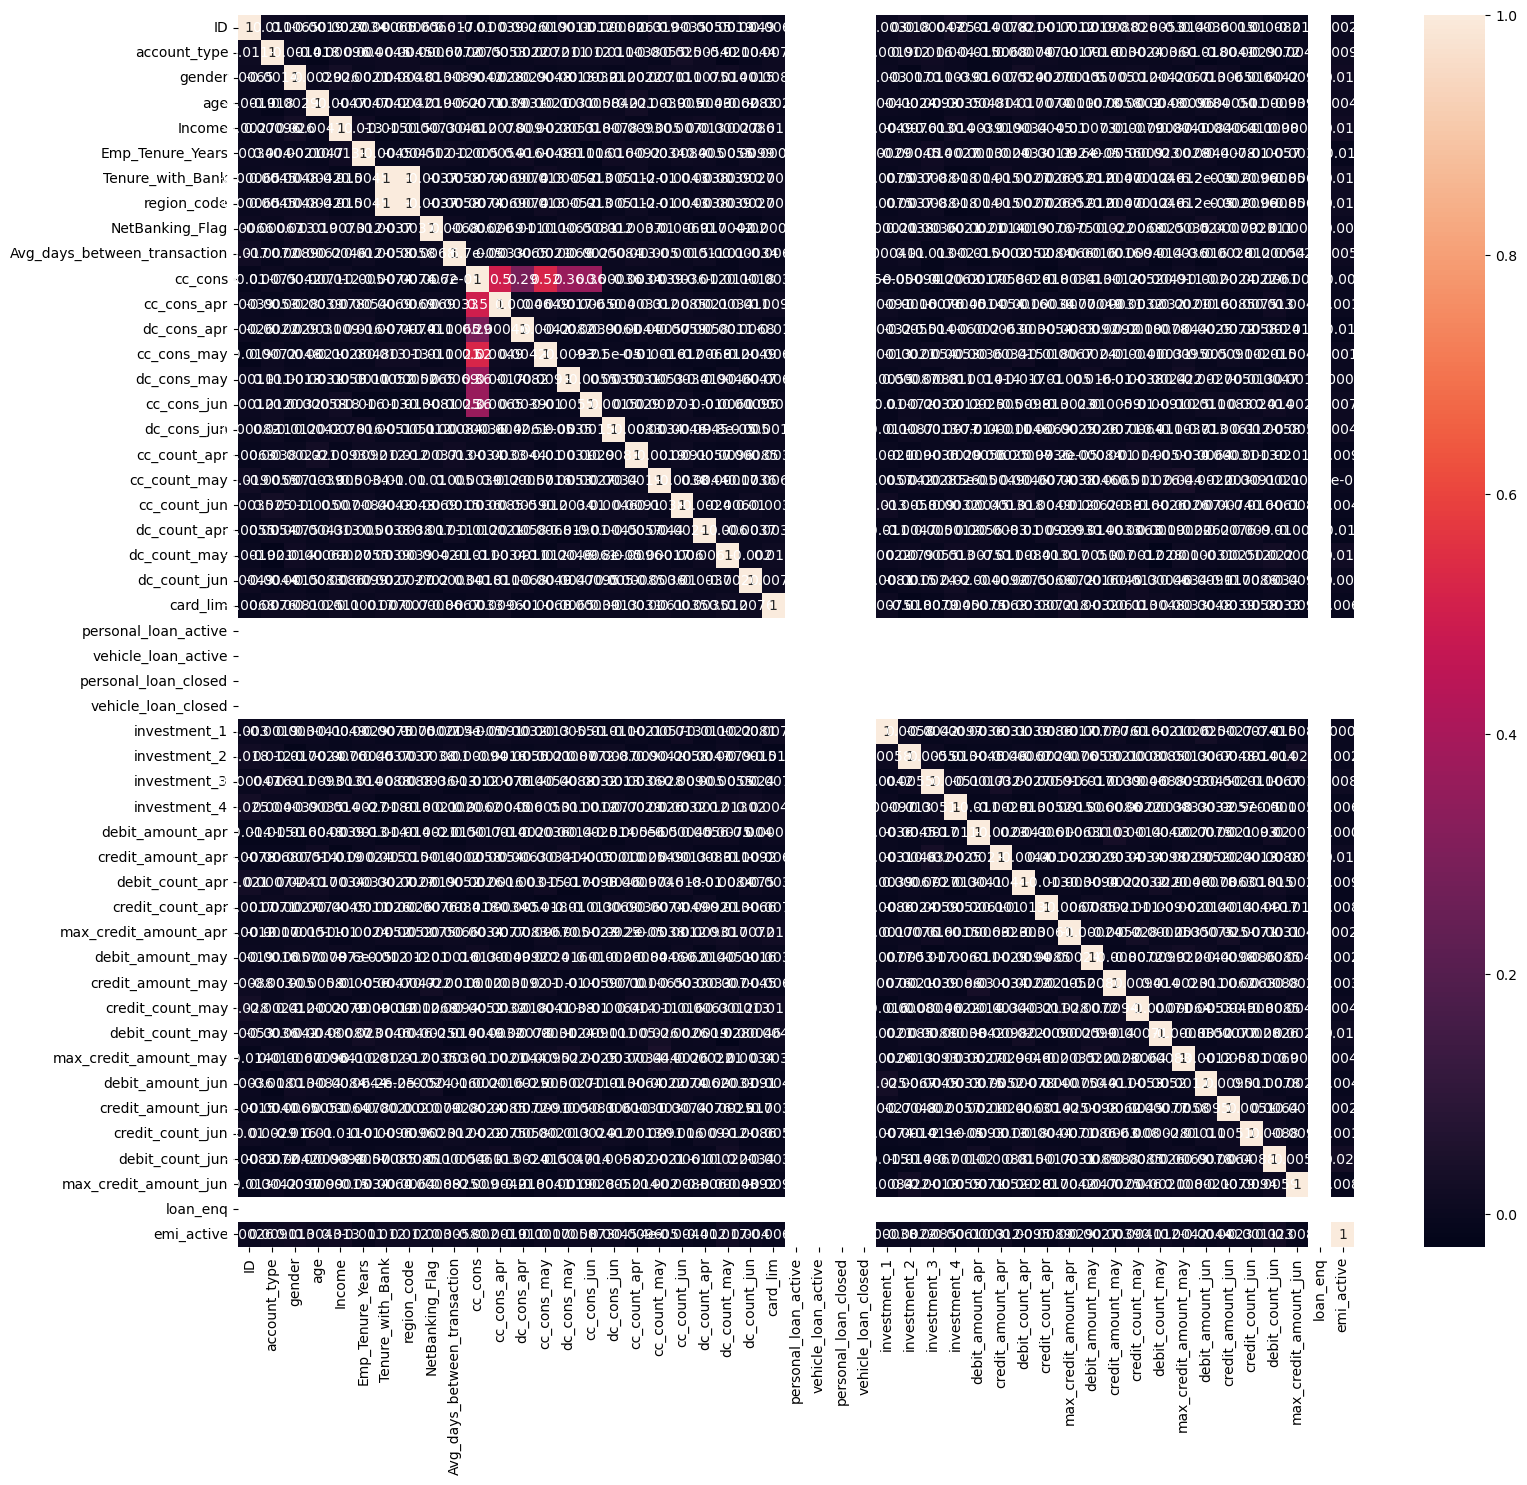

In [20]:
plt.figure(figsize=(18,16))
sns.heatmap(train_df.corr(numeric_only=True),annot=True)

In [21]:
## Since tenure_with_bank column is positively correalted with region_code column so, in this case we need to drop region_code col

train_df.drop(columns=['region_code'],inplace=True)
train_df.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,cc_cons,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17051,0,1,30,2,26.4,9,355,0,16239.0,...,47,20,41860.0,32734.75,80959.00,36,9,171200.0,0,3448.84
1,11491,0,1,37,1,14.4,7,485,0,39002.0,...,0,8,113367.0,60974.75,495080.00,5,3,15694.0,0,3812.69
2,7433,0,1,33,2,3.2,1,764,0,21182.0,...,2,14,168000.0,425802.96,115707.38,7,58,28058.0,0,9432.90
3,14606,0,1,63,1,10.2,6,863,0,8123.0,...,45,44,57750.0,25537.91,63606.00,12,0,24459.0,0,144.61
4,8381,1,1,33,2,26.4,6,523,0,28282.0,...,1,2,18405.0,64687.32,62353.35,49,35,31574.0,0,1887.89


### Identifying and handling outliers

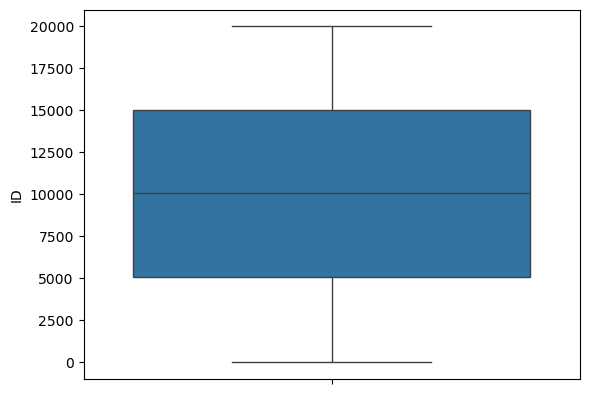

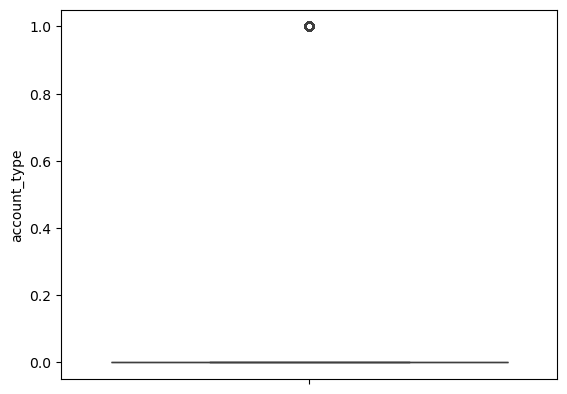

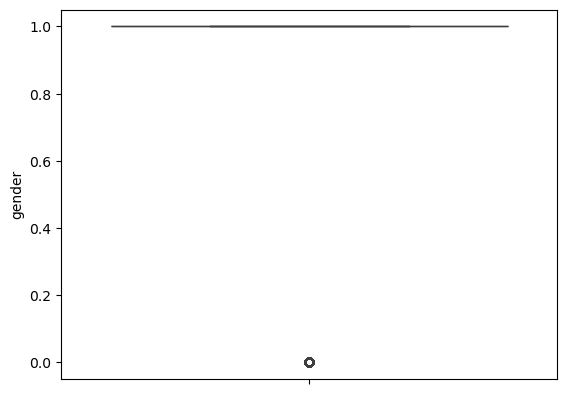

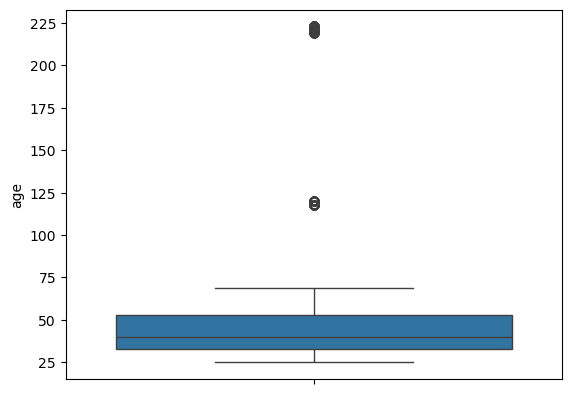

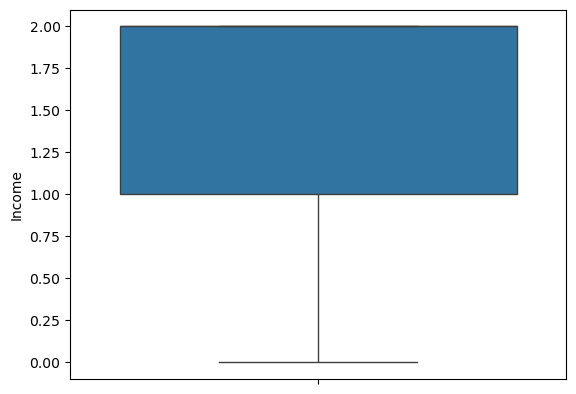

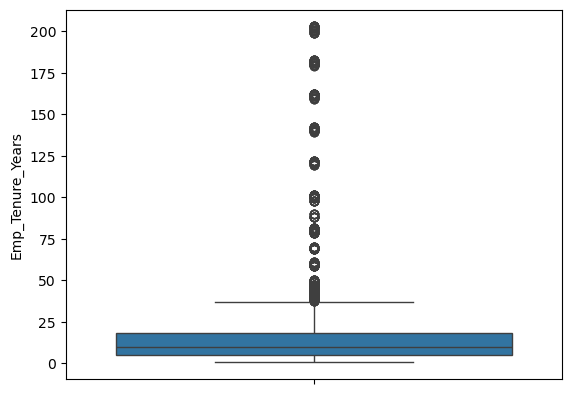

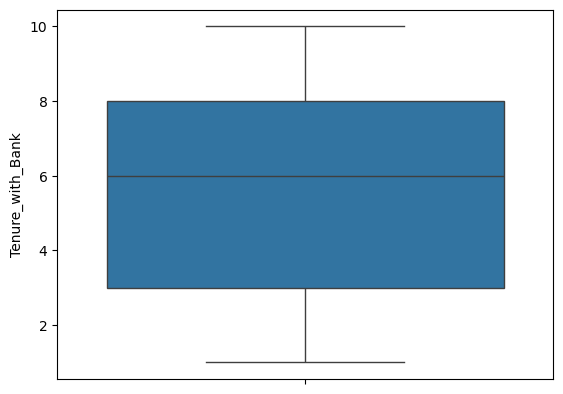

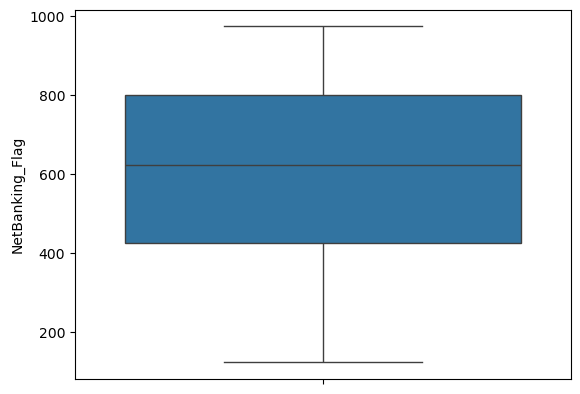

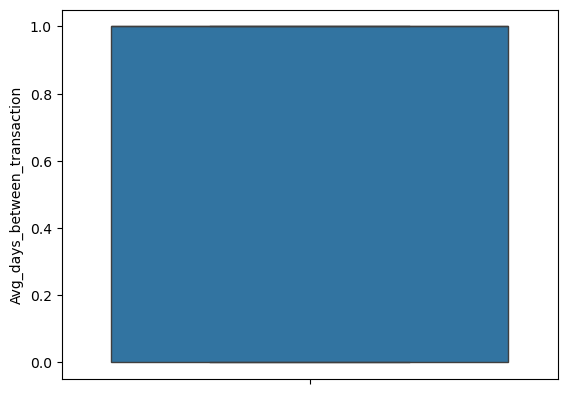

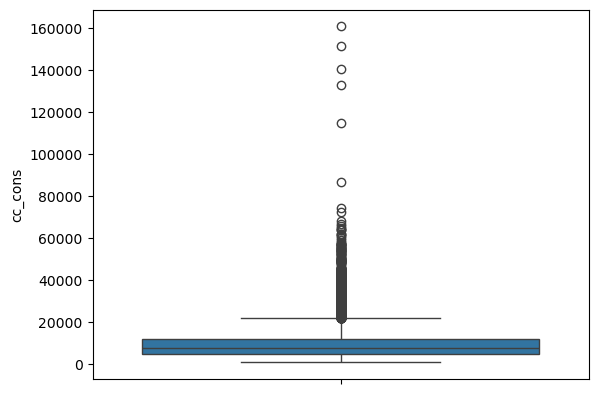

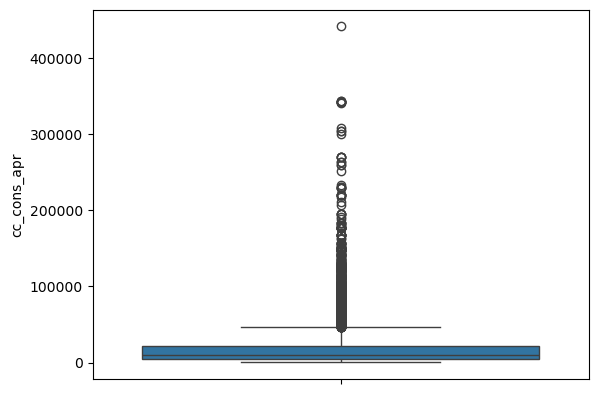

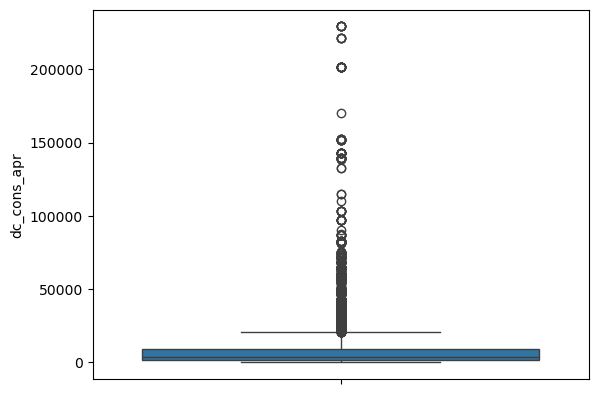

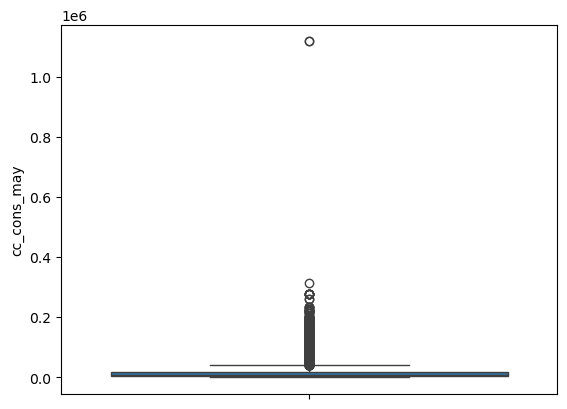

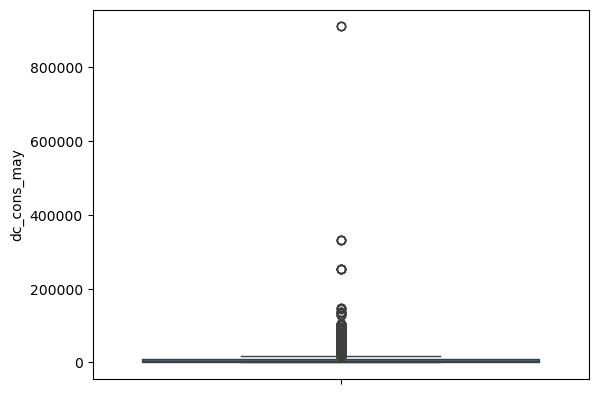

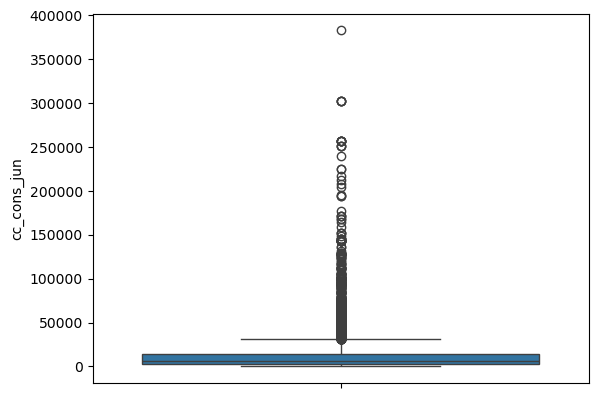

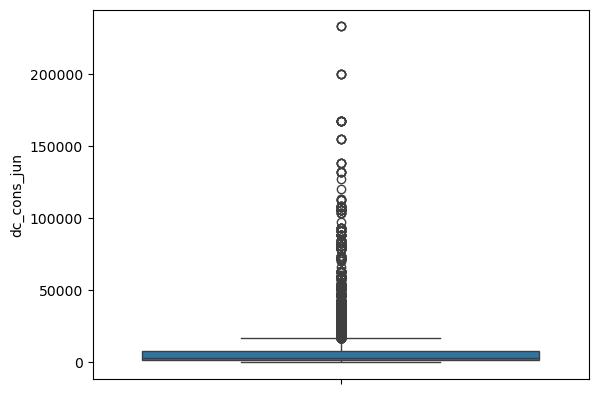

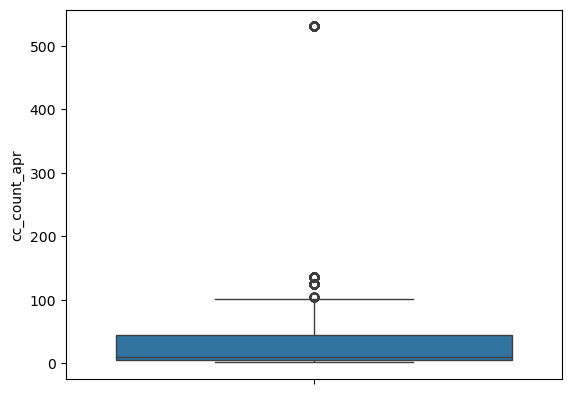

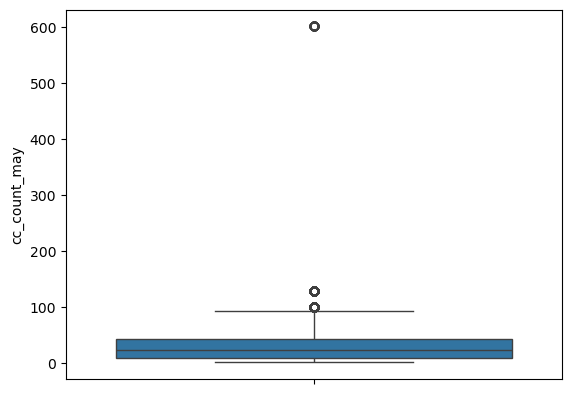

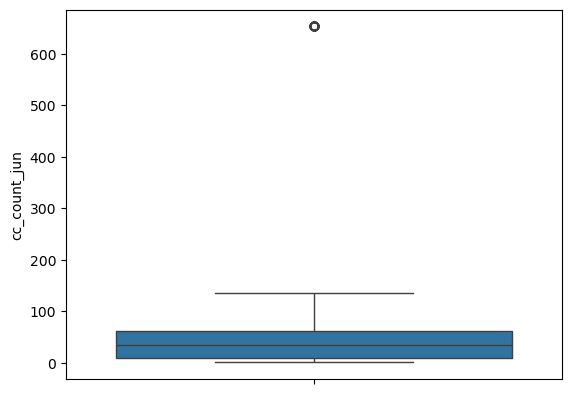

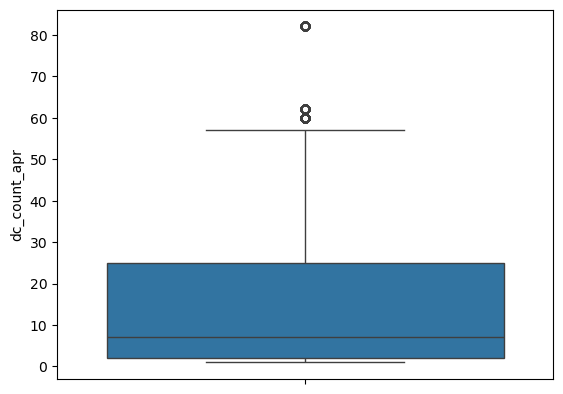

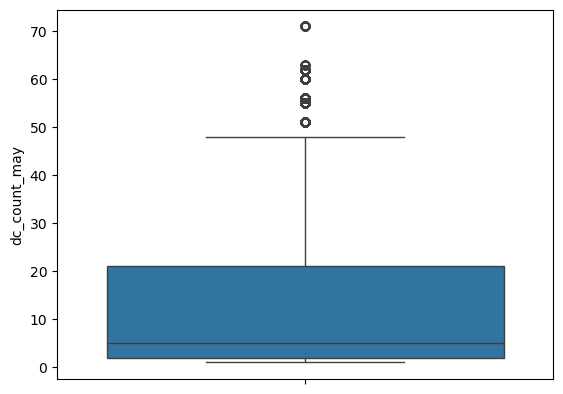

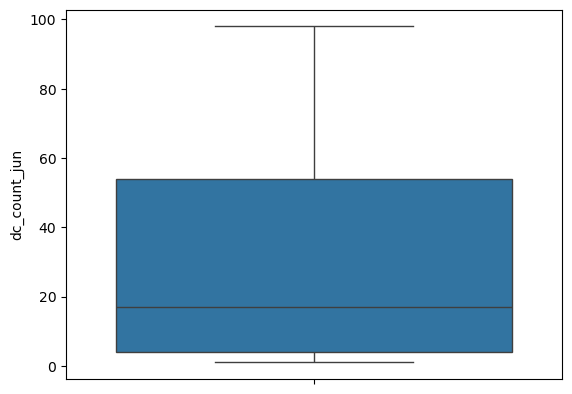

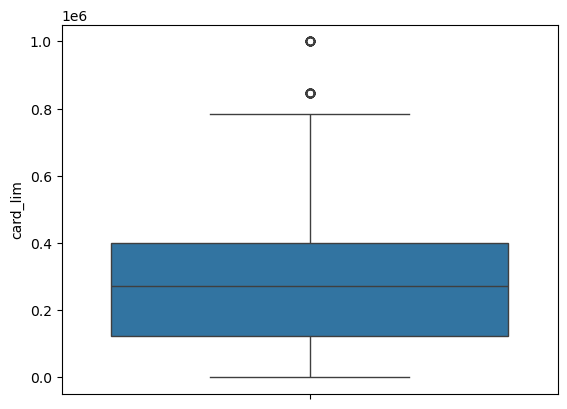

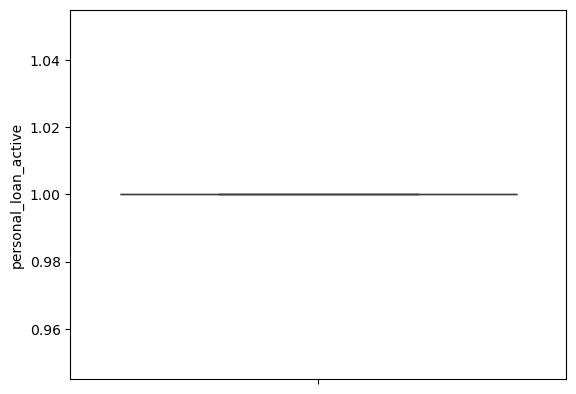

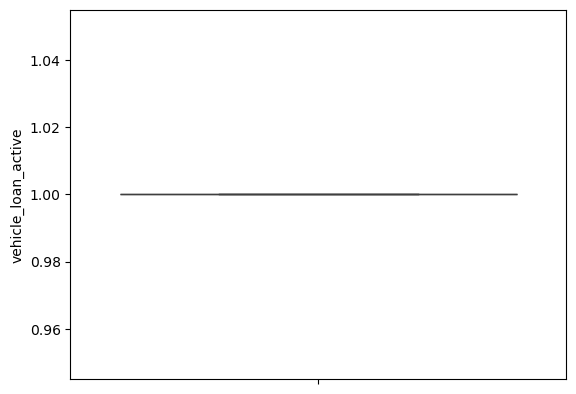

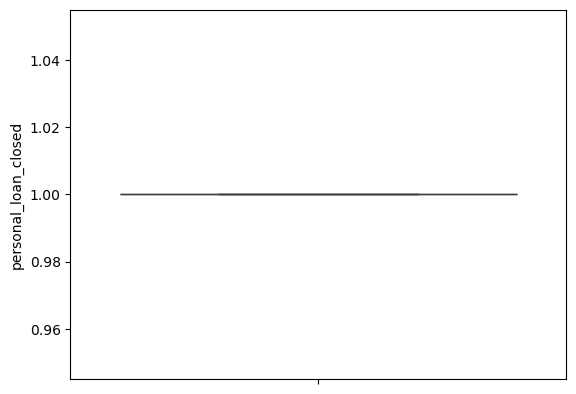

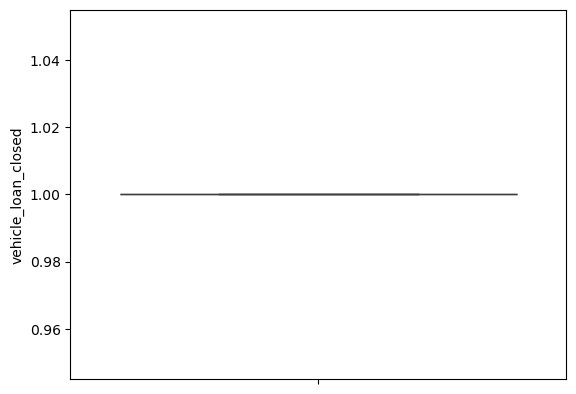

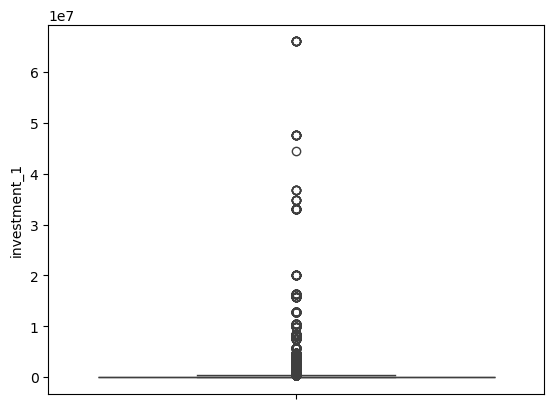

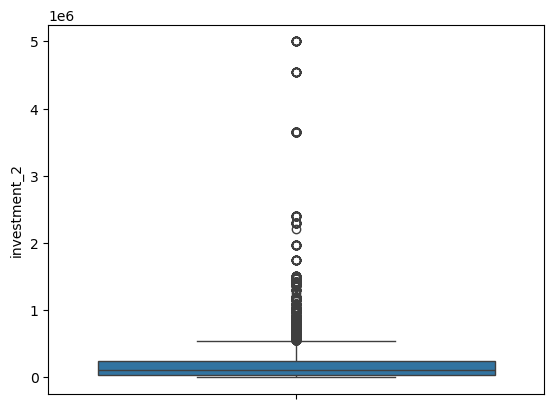

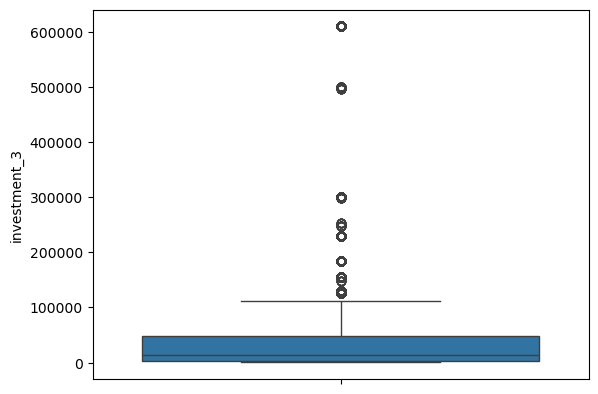

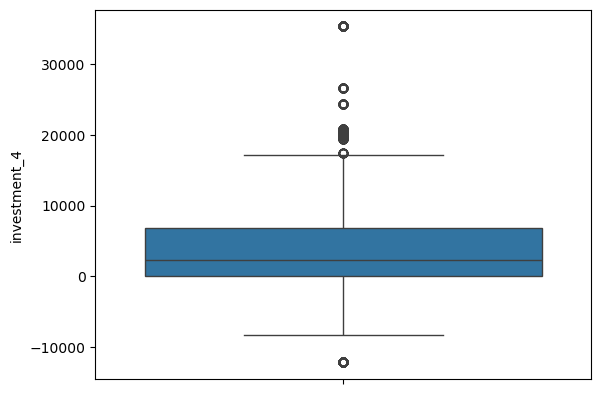

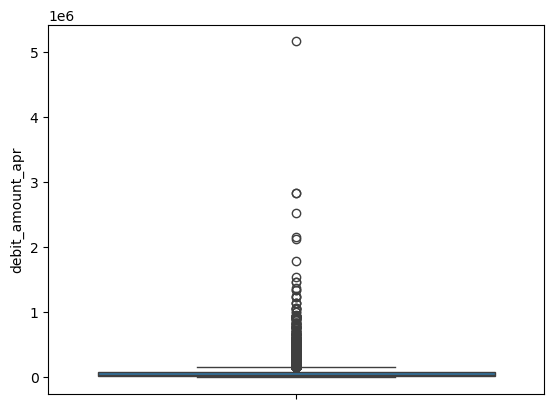

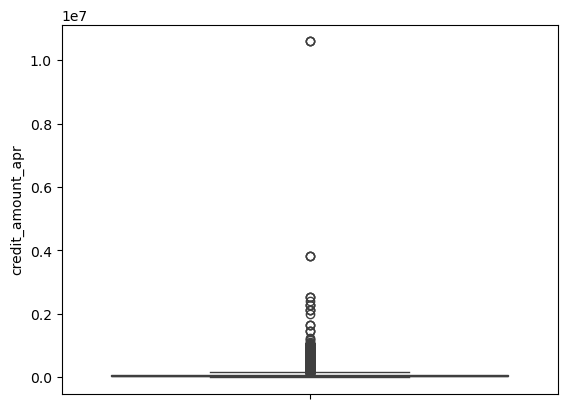

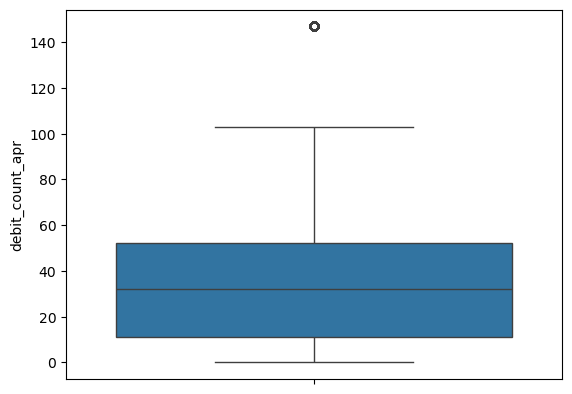

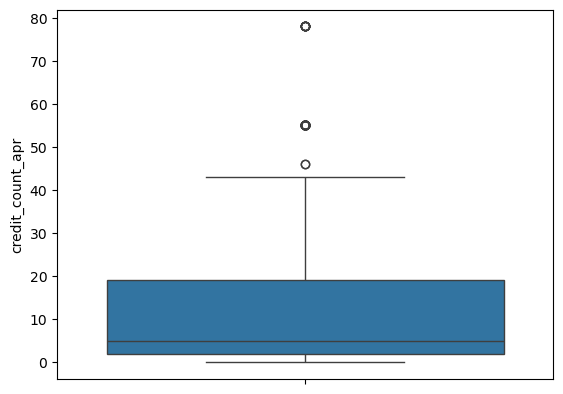

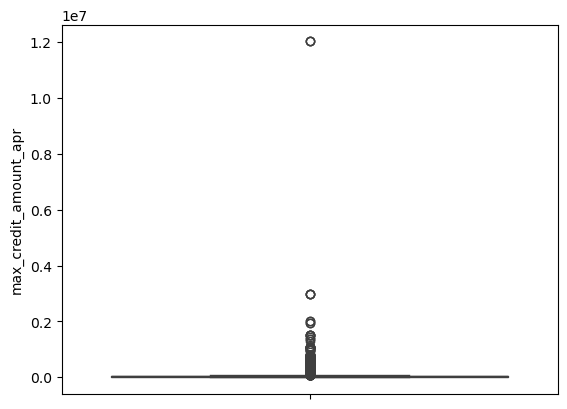

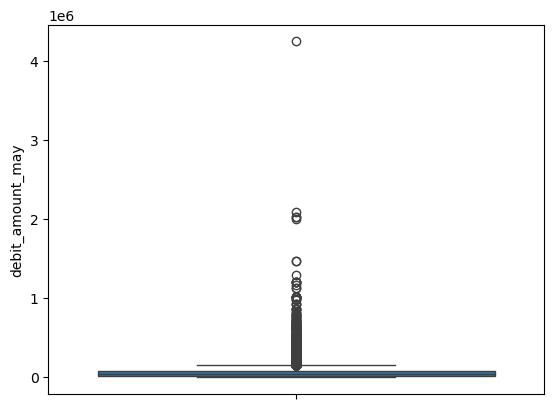

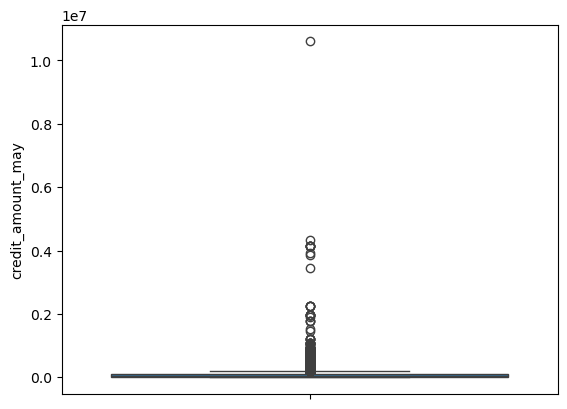

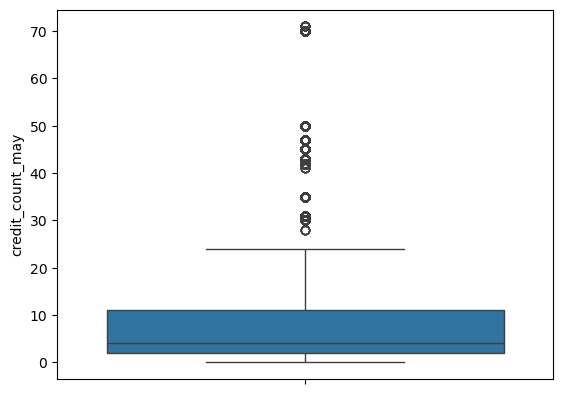

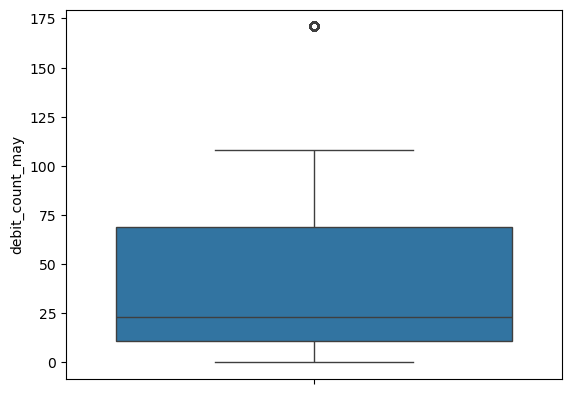

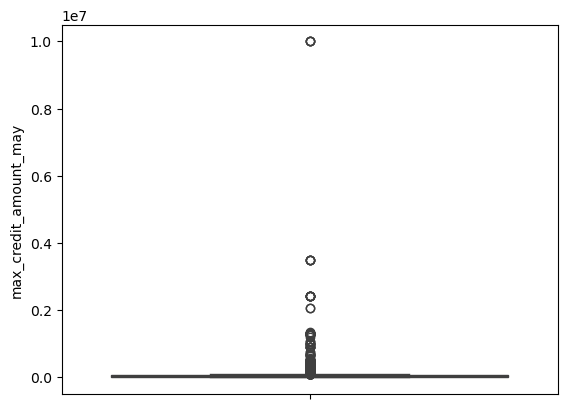

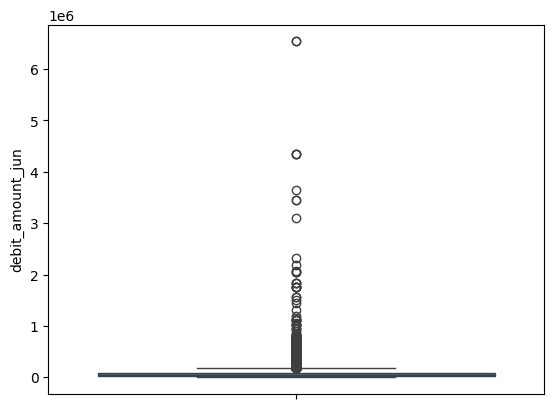

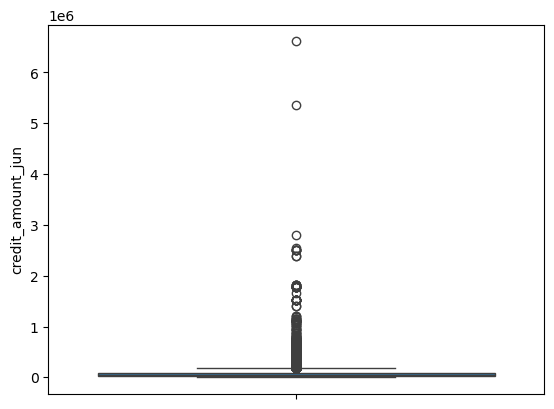

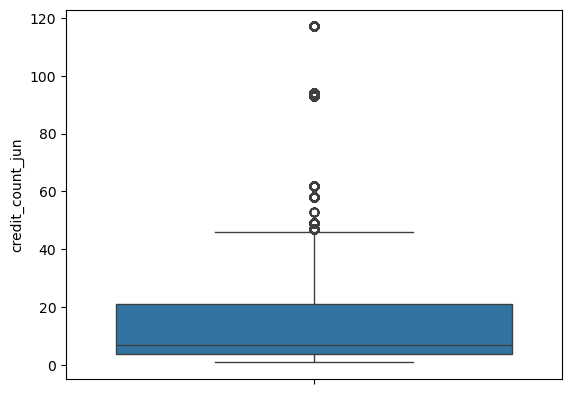

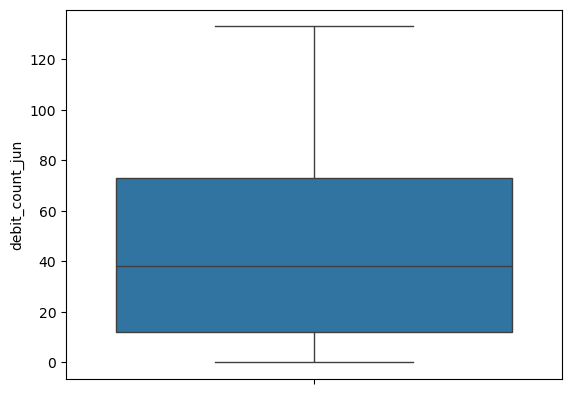

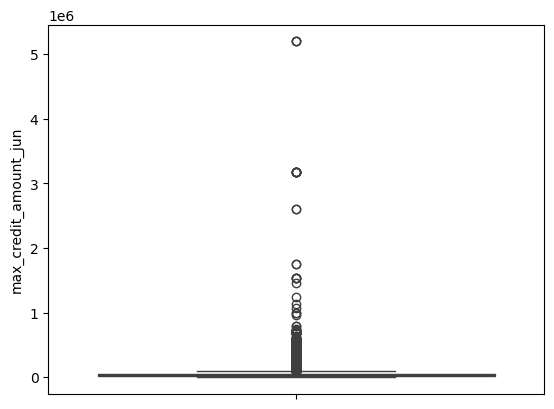

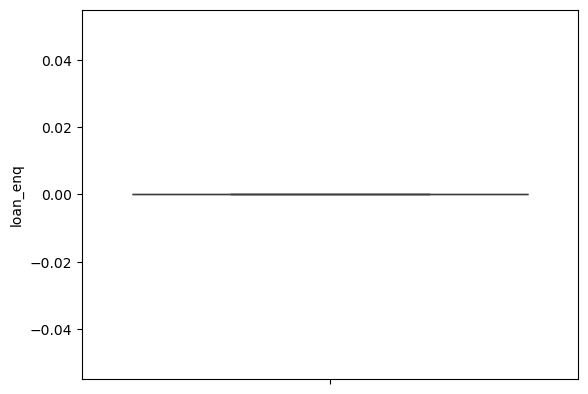

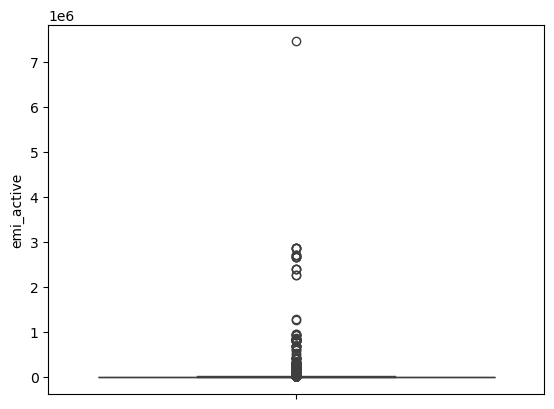

In [22]:
col=train_df.select_dtypes(include='number')
for i in col:
    sns.boxplot(train_df[i])
    plt.show()

In [23]:
def func_outliers(col):
    q3=train_df[i].quantile(0.75)
    q1=train_df[i].quantile(0.25)

    IQR= q3-q1

    ll= q1 -1.5* IQR
    ul= q3 +1.5* IQR
    return(ll,ul)

In [24]:
for i in col:
    ll,ul = func_outliers(i)

    total_records=train_df.shape[0]
    selected_records= train_df[(train_df[i]>ul) | (train_df[i]<ll)].shape[0]
    records_percent= selected_records/ total_records

    print(i)
    print(selected_records)
    print(ll, ul)
    print(records_percent)
    print('\n')
    

ID
0
-9871.625 29947.375
0.0


account_type
2273
0.0 0.0
0.15153333333333333


gender
2055
1.0 1.0
0.137


age
534
3.0 83.0
0.0356


Income
0
-0.5 3.5
0.0


Emp_Tenure_Years
919
-14.249999999999996 37.349999999999994
0.061266666666666664


Tenure_with_Bank
0
-4.5 15.5
0.0


NetBanking_Flag
0
-138.5 1361.5
0.0


Avg_days_between_transaction
0
-1.5 2.5
0.0


cc_cons
833
-5256.694950000001 21584.14945
0.05553333333333333


cc_cons_apr
1217
-21079.931249999998 46895.95875
0.08113333333333334


dc_cons_apr
1220
-9923.53 20896.550000000003
0.08133333333333333


cc_cons_may
1202
-19331.949999999997 41921.25
0.08013333333333333


dc_cons_may
1248
-8209.25 18064.75
0.0832


cc_cons_jun
1181
-13859.25 31110.75
0.07873333333333334


dc_cons_jun
1366
-7998.625 16954.375
0.09106666666666667


cc_count_apr
883
-53.5 102.5
0.058866666666666664


cc_count_may
709
-44.5 95.5
0.047266666666666665


cc_count_jun
49
-66.5 137.5
0.003266666666666667


dc_count_apr
434
-32.5 59.5
0.028933333333333332


dc_c

In [28]:
train_df=train_df[(train_df['emi_active']<=21116.32) & (train_df['emi_active']>(-10190.15))]
train_df.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,NetBanking_Flag,Avg_days_between_transaction,cc_cons,...,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,total_cc_cons,total_dc_cons,total_investment,loan_purpose
0,17051,0,1,30,2,26.4,9,355,0,16239.0,...,80959.00,36,9,171200.0,0,3448.84,21689.300,61061.66,279163.74,2
1,11491,0,1,37,1,14.4,7,485,0,39002.0,...,495080.00,5,3,15694.0,0,3812.69,56636.450,6668.28,324602.05,2
2,7433,0,1,33,2,3.2,1,764,0,21182.0,...,115707.38,7,58,28058.0,0,9432.90,37784.695,17040.54,254063.90,2
3,14606,0,1,63,1,10.2,6,863,0,8123.0,...,63606.00,12,0,24459.0,0,144.61,18519.800,29286.33,131324.00,2
4,8381,1,1,33,2,26.4,6,523,0,28282.0,...,62353.35,49,35,31574.0,0,1887.89,39787.720,14079.23,200574.70,2


In [26]:
### Feature Engineering

train_df['total_cc_cons']=train_df['cc_cons_apr']+train_df['cc_cons_may']+train_df['cc_cons_jun']

train_df['total_dc_cons']= train_df['dc_cons_apr']+ train_df['dc_cons_may']+train_df['dc_cons_jun']

train_df['total_investment']= train_df['investment_1']+ train_df['investment_2']+ train_df['investment_3']+train_df['investment_4']

train_df['loan_purpose']=train_df['personal_loan_active']+ train_df['vehicle_loan_active']

In [27]:
train_df.drop(columns=['cc_cons_apr','cc_cons_may','cc_cons_jun','dc_cons_apr','dc_cons_may','dc_cons_jun',
                       'investment_1','investment_2','investment_3','investment_4', 'personal_loan_active',
                       'vehicle_loan_active'], inplace=True)

In [29]:
train_df.isna().sum()

ID                              0
account_type                    0
gender                          0
age                             0
Income                          0
Emp_Tenure_Years                0
Tenure_with_Bank                0
NetBanking_Flag                 0
Avg_days_between_transaction    0
cc_cons                         0
cc_count_apr                    0
cc_count_may                    0
cc_count_jun                    0
dc_count_apr                    0
dc_count_may                    0
dc_count_jun                    0
card_lim                        0
personal_loan_closed            0
vehicle_loan_closed             0
debit_amount_apr                0
credit_amount_apr               0
debit_count_apr                 0
credit_count_apr                0
max_credit_amount_apr           0
debit_amount_may                0
credit_amount_may               0
credit_count_may                0
debit_count_may                 0
max_credit_amount_may           0
debit_amount_j

In [45]:
## Removing the ID column:

train_df.drop(columns=['ID'],inplace=True)

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()

In [47]:
train_df.dtypes

account_type                      int32
gender                            int32
age                               int64
Income                            int32
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
NetBanking_Flag                   int64
Avg_days_between_transaction      int64
cc_cons                         float64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_closed            float64
vehicle_loan_closed               int64
debit_amount_apr                float64
credit_amount_apr               float64
debit_count_apr                 float64
credit_count_apr                  int64
max_credit_amount_apr           float64
debit_amount_may                float64
credit_amount_may               float64


In [48]:
X=train_df[['account_type', 'gender', 'age', 'Income', 'Emp_Tenure_Years',
       'Tenure_with_Bank', 'NetBanking_Flag', 'Avg_days_between_transaction',
        'cc_count_apr', 'cc_count_may', 'cc_count_jun',
       'dc_count_apr', 'dc_count_may', 'dc_count_jun', 'card_lim',
       'personal_loan_closed', 'vehicle_loan_closed', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'loan_enq', 'emi_active',
       'total_cc_cons', 'total_dc_cons', 'total_investment', 'loan_purpose']]
Y= train_df['cc_cons']

In [49]:
XX=ss.fit_transform(X)

In [50]:
XX_tran= pd.DataFrame(XX)
XX_tran.head()

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,-0.422255,0.398041,-0.580404,0.688223,0.546841,1.218573,-1.108958,-1.602096,-0.415780,-0.601256,...,0.014381,0.589345,-1.013881,0.886010,0.0,-0.322093,-0.594023,1.367929,-0.198478,0.0
1,-0.422255,0.398041,-0.352044,-0.879082,-0.039655,0.520082,-0.517575,-1.602096,-0.405515,-0.132132,...,2.794803,-0.550145,-1.184876,-0.280649,0.0,-0.246391,0.244133,-0.590584,-0.183946,0.0
2,-0.422255,0.398041,-0.482536,0.688223,-0.587052,-1.575390,0.751624,-1.602096,0.025619,-0.519669,...,0.247683,-0.476630,0.382581,-0.187890,0.0,0.922950,-0.207999,-0.217116,-0.206505,0.0
3,-0.422255,0.398041,0.496149,-0.879082,-0.244929,0.170837,1.201985,-1.602096,-0.384984,-0.070942,...,-0.102128,-0.292841,-1.270374,-0.214891,0.0,-1.009571,-0.670039,0.223812,-0.245758,0.0
4,2.368237,0.398041,-0.482536,0.688223,0.546841,0.170837,-0.344709,-1.602096,-0.405515,-0.519669,...,-0.110538,1.067196,-0.272901,-0.161512,0.0,-0.646864,-0.159959,-0.323742,-0.223611,0.0


### Train-test split

In [51]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain , ytest= train_test_split(XX_tran, Y, test_size=0.20, random_state=16)

xtrain.shape, xtest.shape, ytrain.shape , ytest.shape

((10885, 38), (2722, 38), (10885,), (2722,))

In [52]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

lr.fit(xtrain, ytrain)

pred= lr.predict(xtest)
pred

array([4840.04969515, 7914.76842448, 6192.88814716, ..., 5143.34000738,
       2441.07368893, 8265.72256208])

### Model Evaluation

In [53]:
y=np.array(ytest)
y_pred=np.array(pred)

#Root mean squared percentage error

RMSPE=np.sqrt(np.mean(np.square((y - y_pred) / y)))
RMSPE

0.42170708913202803

In [54]:
from sklearn.metrics import r2_score

In [55]:
r2_score(ytest, pred)

0.8356149622255248

In [56]:
## RandomForest

from sklearn.ensemble import RandomForestRegressor
rfc= RandomForestRegressor(n_estimators=50)

rfc.fit(xtrain,ytrain)

rfc_pred= rfc.predict(xtest)
rfc_pred

array([5117.93782 , 7439.191958, 6169.678896, ..., 4228.572522,
       2765.49325 , 7687.22192 ])

In [57]:
## Model Evaluation

r2_score(ytest, rfc_pred)

0.7898689444602317

In [58]:
## Gradient Boosting

from sklearn.ensemble import GradientBoostingRegressor

gbr= GradientBoostingRegressor()

gbr.fit(xtrain,ytrain)

gbr_pred= gbr.predict(xtest)
gbr_pred

array([4909.51929665, 7465.29262387, 6034.19826023, ..., 5002.27296134,
       2923.42770716, 7745.22493102])

In [59]:
r2_score(ytest, gbr_pred)

0.8126085188226004

In [88]:
print('Since the linear regression gave the maximum accuracy of all the models we trained. So, linear regression model is accepted for predicting the future values') 

Since the linear regression gave the maximum accuracy of all the models we trained. So, linear regression model is accepted for predicting the future values


### Predicting the credit consumption for next three months for the customers having missing values

In [32]:
predict_=final_df[final_df['cc_cons'].isna()]
predict_.reset_index(drop=True, inplace=True)
predict_.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,current,M,37,MEDIUM,11.9,4,4,575,1,...,24,20,9750.0,30527.88,31271.00,3,12,25945.92,Y,1170.49
1,13541,current,M,33,MEDIUM,7.8,6,6,394,0,...,43,40,16967.0,14342.83,16582.00,6,39,12214.00,Y,16447.45
2,13431,current,M,53,LOW,33.0,10,10,324,1,...,42,35,36398.0,32503.16,33539.54,5,9,13215.00,Y,2622.28
3,8687,current,M,33,MEDIUM,7.8,5,5,370,1,...,3,5,97825.0,93572.42,109429.75,21,0,72317.00,Y,340.79
4,14727,current,M,62,LOW,12.6,9,9,505,1,...,70,75,27936.0,19011.50,41401.00,6,35,42344.00,Y,2812.20


In [33]:
predict_ID=predict_['ID']

In [35]:
le1= LabelEncoder()

col1=['account_type', 'gender','Income','loan_enq']
for i in col1:
    predict_[col1]= predict_[col1].astype('str')
for i in col1:
    predict_[i]=le.fit_transform(predict_[i])

In [36]:
predict_.head()

,ID,account_type,gender,age,Income,Emp_Tenure_Years,Tenure_with_Bank,region_code,NetBanking_Flag,Avg_days_between_transaction,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,17591,1,2,37,3,11.9,4,4,575,1,...,24,20,9750.0,30527.88,31271.00,3,12,25945.92,0,1170.49
1,13541,1,2,33,3,7.8,6,6,394,0,...,43,40,16967.0,14342.83,16582.00,6,39,12214.00,0,16447.45
2,13431,1,2,53,2,33.0,10,10,324,1,...,42,35,36398.0,32503.16,33539.54,5,9,13215.00,0,2622.28
3,8687,1,2,33,3,7.8,5,5,370,1,...,3,5,97825.0,93572.42,109429.75,21,0,72317.00,0,340.79
4,14727,1,2,62,2,12.6,9,9,505,1,...,70,75,27936.0,19011.50,41401.00,6,35,42344.00,0,2812.20


In [37]:
## Feature Engineering

predict_['total_cc_cons']=predict_['cc_cons_apr']+predict_['cc_cons_may']+predict_['cc_cons_jun']

predict_['total_dc_cons']= predict_['dc_cons_apr']+ predict_['dc_cons_may']+predict_['dc_cons_jun']

predict_['total_investment']= predict_['investment_1']+ predict_['investment_2']+ predict_['investment_3']+predict_['investment_4']

predict_['loan_purpose']=predict_['personal_loan_active']+ predict_['vehicle_loan_active']

In [38]:
predict_.drop(columns=['cc_cons_apr','cc_cons_may','cc_cons_jun','dc_cons_apr','dc_cons_may','dc_cons_jun',
                       'investment_1','investment_2','investment_3','investment_4', 'personal_loan_active',
                       'vehicle_loan_active'], inplace=True)

In [39]:
predict_.drop(columns=['cc_cons'],inplace=True)

In [40]:
predict_.drop(columns=['region_code','ID'],inplace=True)

In [41]:
predict_.dtypes


account_type                      int32
gender                            int32
age                               int64
Income                            int32
Emp_Tenure_Years                float64
Tenure_with_Bank                  int64
NetBanking_Flag                   int64
Avg_days_between_transaction      int64
cc_count_apr                    float64
cc_count_may                      int64
cc_count_jun                      int64
dc_count_apr                      int64
dc_count_may                      int64
dc_count_jun                      int64
card_lim                          int64
personal_loan_closed            float64
vehicle_loan_closed               int64
debit_amount_apr                float64
credit_amount_apr               float64
debit_count_apr                 float64
credit_count_apr                  int64
max_credit_amount_apr           float64
debit_amount_may                float64
credit_amount_may               float64
credit_count_may                  int64


In [42]:
ss1= StandardScaler()

pred_X=pd.DataFrame(ss.fit_transform(predict_))

In [60]:
predicted_val=lr.predict(pred_X)

In [61]:
pred_df=pd.DataFrame(predicted_val,columns=['Predicted_values'])
pred_df.head()

,Predicted_values
0,4574.719112
1,6668.209374
2,2425.836808
3,10863.988091
4,2762.522665


In [63]:
predict_new=pd.concat([predict_ID,pred_df],axis=1)

In [64]:
predict_new.head()

,ID,Predicted_values
0,17591,4574.719112
1,13541,6668.209374
2,13431,2425.836808
3,8687,10863.988091
4,14727,2762.522665
